# Desarrollo de Aplicaciones para el Análisis de Datos. - Práctica 2
---

Ahora es tu turno de analizar un banco de datos del mundo real que contiene datos de vuelos del Departamento de Transporte de Estados Unidos

Primero carga y visualiza los datos. (flights.csv)

In [ ]:
import pandas as pd
vuelos = pd.read_csv("/content/flights.csv")
print(vuelos)

        Year  Month  DayofMonth  DayOfWeek Carrier  OriginAirportID  \
0       2013      9          16          1      DL            15304   
1       2013      9          23          1      WN            14122   
2       2013      9           7          6      AS            14747   
3       2013      7          22          1      OO            13930   
4       2013      5          16          4      DL            13931   
...      ...    ...         ...        ...     ...              ...   
271935  2013      9          20          5      VX            13204   
271936  2013      4          19          5      FL            10397   
271937  2013     10          26          6      WN            12191   
271938  2013      5           7          2      HA            13830   
271939  2013      6          11          2      UA            14771   

                               OriginAirportName     OriginCity OriginState  \
0                            Tampa International          Tampa     

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


El banco de datos contiene observaciones de los vuelos nacionales estadounidenses en 2013 y consta de los siguientes campos:
- **Año**: El año del vuelo (todos los registros son de 2013).
- **Mes**: El mes del vuelo
- **DayofMonth** (día del mes): El día del mes en el que salió el vuelo
- **Día de la semana**: El día de la semana en que salió el vuelo - del 1 (lunes) al 7 (domingo)
- **Compañía aérea**: La abreviatura de dos letras de la compañía aérea.
- **OriginAirportID**: Identificador numérico único del aeropuerto de salida.
- **OriginAirportName**: El nombre completo del aeropuerto de salida
- **OriginCity** (Ciudad de origen): Ciudad del aeropuerto de salida
- **OriginState**: Estado del aeropuerto de salida Estado del aeropuerto de salida
- **DestAirportID**: Identificador numérico único del aeropuerto de destino
- **DestAirportName**: El nombre completo del aeropuerto de destino
- **DestCity**: La ciudad del aeropuerto de destino
- **DestState**: El estado del aeropuerto de destino
- **CRSDepTime**: La hora de salida programada
- **DepDelay**: El número de minutos que se retrasó la salida (los vuelos que salieron antes de lo previsto tienen un valor negativo)
- **DelDelay15**: Un indicador binario de que la salida se retrasó más de 15 minutos (y por lo tanto se considera "tarde")
- **CRSArrTime**: La hora de llegada programada
- **ArrDelay**: El número de minutos que se retrasó la lleg

Lo que se tiene que hacer en esta práctica es explorar los datos de vuelo para analizar los posibles factores que afectan a los retrasos en la salida o llegada de un vuelo.

 1. Empieza con limpiar los datos.
     - Identifica los datos nulos o ausentes e imputa los valores de sustitución adecuados.
     - Identifica y elimina cualquier valor atípico en las columnas *DepDelay* y *ArrDelay*.
             - Tips:
            - Primero visualiza la distribución de las columnas
            - Define donde se observan los valores atipicos
            - Recorta los datos de tal forma que los percentiles esten entre 1 y 90
 2. Explora los datos limpios.
     - Consulta las estadísticas de resumen de los campos numéricos del conjunto de datos.
     - Determina la distribución de las columnas *DepDelay* y *ArrDelay*.
     - Utiliza estadísticas, funciones de agregación y visualización para responder a las siguientes preguntas:
         - *¿Cuáles son los promedios (mean) de salida y llegada?*
         - *¿Cómo se comparan las compañías en cuanto a retrasos en las llegadas?*
         - *¿Hay días de la semana más propensos a las llegadas que otros?*
         - *¿Cuál es el aeropuerto de salida con mayor retraso medio?*
         - *¿Las salidas tardías suelen provocar mayores retrasos en las llegadas que las salidas puntuales?*
         - *¿Qué ruta (del aeropuerto de origen al aeropuerto de destino) tiene más llegadas con retraso?*
         - *¿Qué ruta tiene el mayor retraso medio de llegada?*

In [ ]:
valores_faltantes = vuelos.isnull().sum()
moda=vuelos['DepDel15'].mode()
print(valores_faltantes)
print(moda)
vuelos['DepDel15'].fillna("moda",inplace=True)


Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64
0    0.0
Name: DepDel15, dtype: float64


In [ ]:
valores_faltantes = vuelos.isnull().sum()
print(valores_faltantes)


Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64


     ArrDelay  Frecuencia
550       -75           1
428       -68           2
542       -67           1
452       -66           2
545       -65           1
..        ...         ...
518      1301           1
496      1348           1
481      1394           1
459      1429           1
547      1440           1

[561 rows x 2 columns]


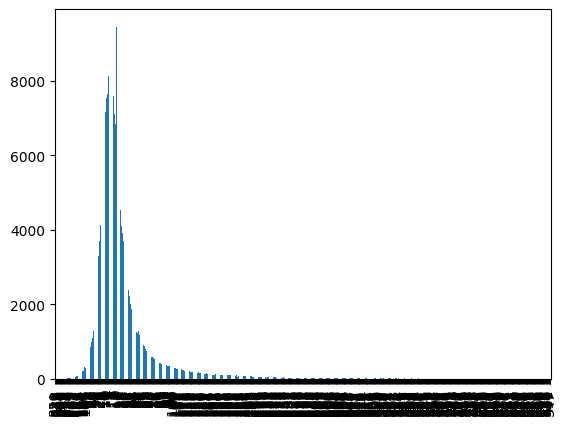

In [ ]:
import matplotlib.pyplot as plt
vuelo=vuelos[['ArrDelay','DepDelay']]

frec = vuelo['ArrDelay'].value_counts().reset_index()
frec.columns = ['ArrDelay', 'Frecuencia']
frec=frec.sort_values('ArrDelay')
print(frec)
#frecuencia_valores = vuelos.groupby('ArrDelay').count().sort_values('ArrDelay')
# Crear un gráfico de barras
#print(frecuencia_valores)
frec['Frecuencia'].plot(kind='bar')
plt.show()



     DepDelay  Frecuencia
517       -63           1
474       -52           1
504       -35           1
462       -27           1
351       -24           4
..        ...         ...
512      1305           1
510      1320           1
439      1366           1
443      1386           1
428      1425           1

[526 rows x 2 columns]


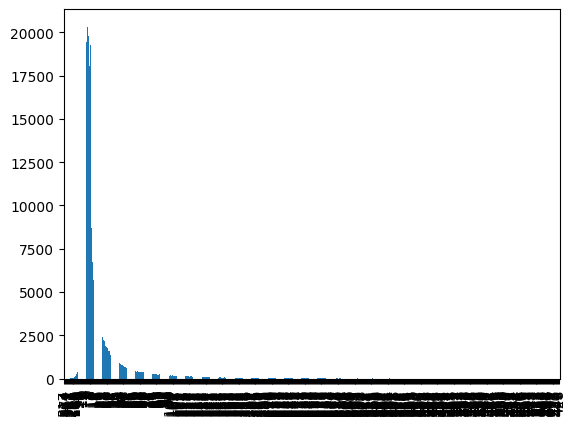

In [ ]:


frec = vuelo['DepDelay'].value_counts().reset_index()
frec.columns = ['DepDelay', 'Frecuencia']
frec=frec.sort_values('DepDelay')
print(frec)
#frecuencia_valores = vuelos.groupby('ArrDelay').count().sort_values('ArrDelay')
# Crear un gráfico de barras
#print(frecuencia_valores)
frec['Frecuencia'].plot(kind='bar')
plt.show()



In [ ]:
percentiles_dep = vuelos['DepDelay'].quantile([0.1, 0.90])
# Filtrar el DataFrame para mantener solo los registros dentro de los percentiles
flights = vuelos[(vuelos['DepDelay'] >= percentiles_dep[0.1]) & (vuelos['DepDelay'] <= percentiles_dep[0.90])]

# Calcular los percentiles del 10 al 90
percentiles_arr = vuelos['ArrDelay'].quantile([0.1, 0.9])
# Filtrar el DataFrame para mantener solo los registros dentro de los percentiles
flights= vuelos[(vuelos['ArrDelay'] >= percentiles_arr[0.1]) & (vuelos['ArrDelay'] <= percentiles_arr[0.9])]

     DepDelay  Frecuencia
122       -52           1
109       -35           1
125       -24           1
103       -23           1
97        -22           2
..        ...         ...
128       243           1
121       245           1
123       291           1
114       460           1
108       694           1

[138 rows x 2 columns]


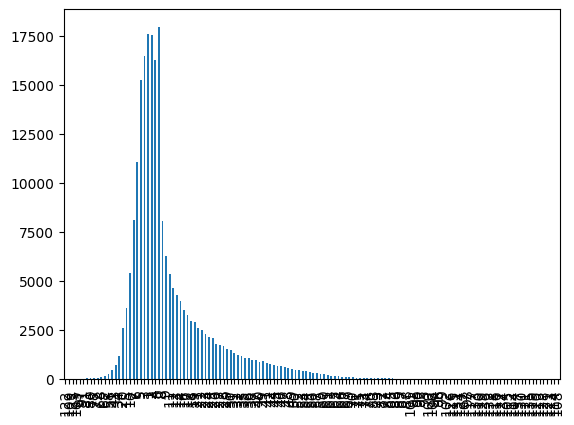

In [ ]:
import matplotlib.pyplot as plt
vuelo=flights[['DepDelay','ArrDelay']]

frec = vuelo['DepDelay'].value_counts().reset_index()
frec.columns = ['DepDelay', 'Frecuencia']
frec=frec.sort_values('DepDelay')
print(frec)
#frecuencia_valores = vuelos.groupby('ArrDelay').count().sort_values('ArrDelay')
# Crear un gráfico de barras
#print(frecuencia_valores)
frec['Frecuencia'].plot(kind='bar')
plt.show()



    ArrDelay  Frecuencia
23       -18        4138
21       -17        4733
18       -16        5263
16       -15        5746
14       -14        6222
13       -13        6689
10       -12        7172
9        -11        7526
7        -10        7651
3         -9        8135
4         -8        8124
1         -7        8348
2         -6        8202
5         -5        8040
6         -4        7659
8         -3        7588
11        -2        7114
12        -1        6845
0          0        9454
15         1        6046
17         2        5619
19         3        5147
20         4        4765
22         5        4521
24         6        4112
25         7        3901
26         8        3684
27         9        3305
28        10        3094
29        11        2888
30        12        2636
31        13        2457
32        14        2381
33        15        2221
34        16        2017
35        17        1866
36        18        1810
37        19        1722
38        20        1620


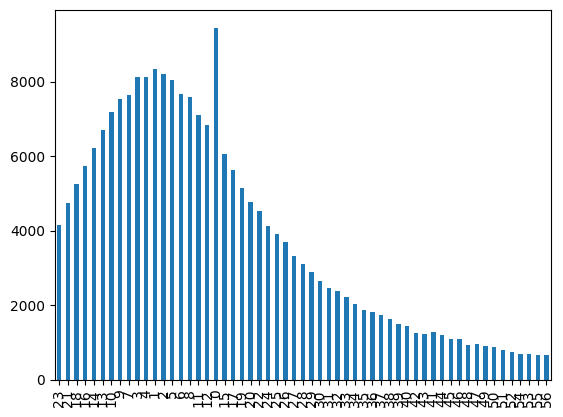

In [ ]:
import matplotlib.pyplot as plt
vuelo=flights[['ArrDelay','DepDelay']]

frec = vuelo['ArrDelay'].value_counts().reset_index()
frec.columns = ['ArrDelay', 'Frecuencia']
frec=frec.sort_values('ArrDelay')
print(frec)
#frecuencia_valores = vuelos.groupby('ArrDelay').count().sort_values('ArrDelay')
# Crear un gráfico de barras
#print(frecuencia_valores)
frec['Frecuencia'].plot(kind='bar')
plt.show()



In [ ]:
# Calcular la media llegadas y salidas
media_dep = flights['DepDelay'].mean()
media_arr = flights['ArrDelay'].mean()
print('media llegada:',media_arr)
print('media salida:',media_dep)

media llegada: -0.26754863813229574
media salida: 2.723584344243534


Carrier
9E   -2.335015
DL   -2.307287
EV   -1.231445
YV   -1.023075
OO   -1.002492
HA   -0.937644
UA   -0.932112
VX   -0.854886
AS   -0.823891
US   -0.406802
B6   -0.285809
AA   -0.271774
FL    0.182379
MQ    0.859437
WN    1.751046
F9    2.086928
Name: ArrDelay, dtype: float64


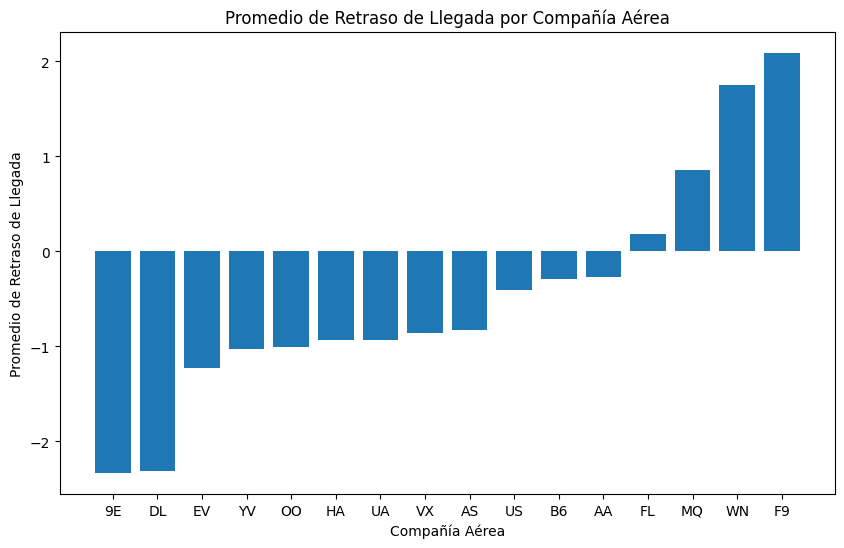

In [ ]:

mean_retraso_por_compania = flights.groupby('Carrier')['ArrDelay'].mean().sort_values()
print(mean_retraso_por_compania)
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.bar(mean_retraso_por_compania.index, mean_retraso_por_compania.values)

# Etiquetas y título
plt.xlabel('Compañía Aérea')
plt.ylabel('Promedio de Retraso de Llegada')
plt.title('Promedio de Retraso de Llegada por Compañía Aérea')
plt.show()

el peor dia 1


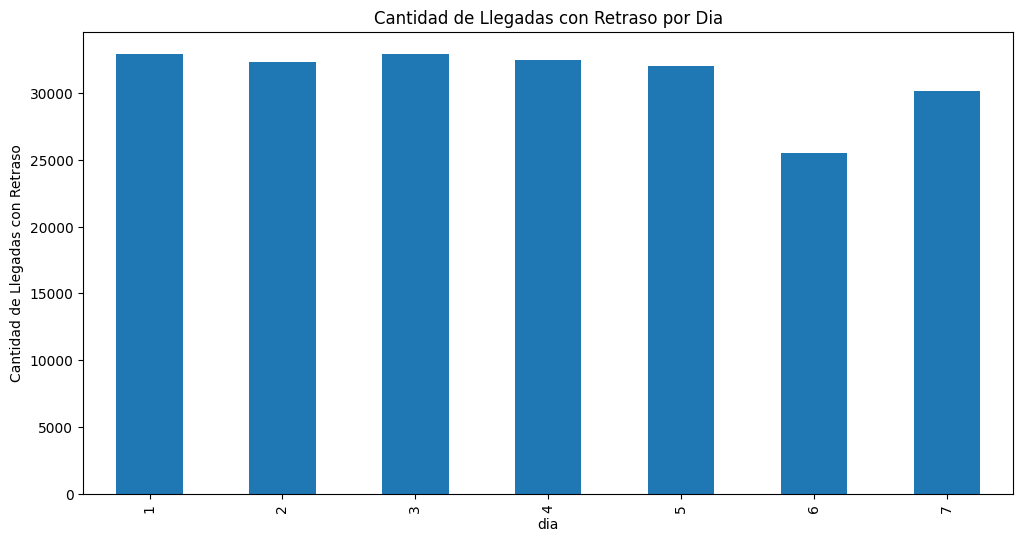

In [ ]:
conteo_por_dia = flights.groupby('DayOfWeek').size()
plt.figure(figsize=(12, 6))
conteo_por_dia.plot(kind='bar')
plt.xlabel('dia')
plt.ylabel('Cantidad de Llegadas con Retraso')
plt.title('Cantidad de Llegadas con Retraso por Dia')
plt.xticks(rotation=90)
dia_con_mas_llegadas_con_retraso = conteo_por_dia.idxmax()
print('el peor dia',dia_con_mas_llegadas_con_retraso)

el peor dia 4


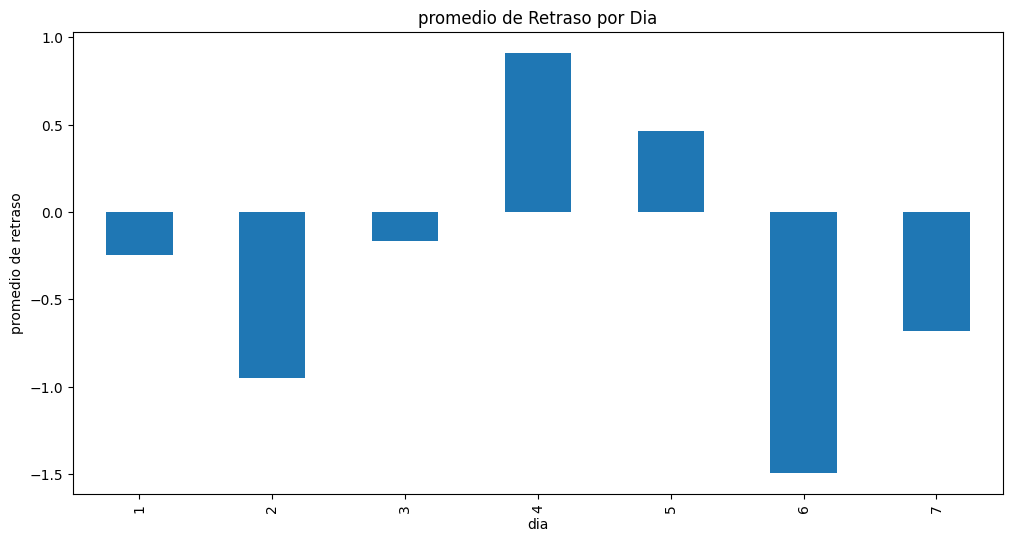

In [ ]:
conteo_por_dia = flights.groupby('DayOfWeek')['ArrDelay'].mean()
plt.figure(figsize=(12, 6))
conteo_por_dia.plot(kind='bar')
plt.xlabel('dia')
plt.ylabel('promedio de retraso')
plt.title('promedio de Retraso por Dia')
plt.xticks(rotation=90)
dia_con_mas_llegadas_con_retraso = conteo_por_dia.idxmax()
print('el peor dia',dia_con_mas_llegadas_con_retraso)

la peor ruta ('San Francisco International', 'Los Angeles International')


(array([   0,    1,    2, ..., 2443, 2444, 2445]),
 [Text(0, 0, '(Albuquerque International Sunport, Baltimore/Washington International Thurgood Marshall)'),
  Text(1, 0, '(Albuquerque International Sunport, Chicago Midway International)'),
  Text(2, 0, "(Albuquerque International Sunport, Chicago O'Hare International)"),
  Text(3, 0, '(Albuquerque International Sunport, Dallas Love Field)'),
  Text(4, 0, '(Albuquerque International Sunport, Dallas/Fort Worth International)'),
  Text(5, 0, '(Albuquerque International Sunport, Denver International)'),
  Text(6, 0, '(Albuquerque International Sunport, George Bush Intercontinental/Houston)'),
  Text(7, 0, '(Albuquerque International Sunport, Hartsfield-Jackson Atlanta International)'),
  Text(8, 0, '(Albuquerque International Sunport, John F. Kennedy International)'),
  Text(9, 0, '(Albuquerque International Sunport, Kansas City International)'),
  Text(10, 0, '(Albuquerque International Sunport, Los Angeles International)'),
  Text(11, 0

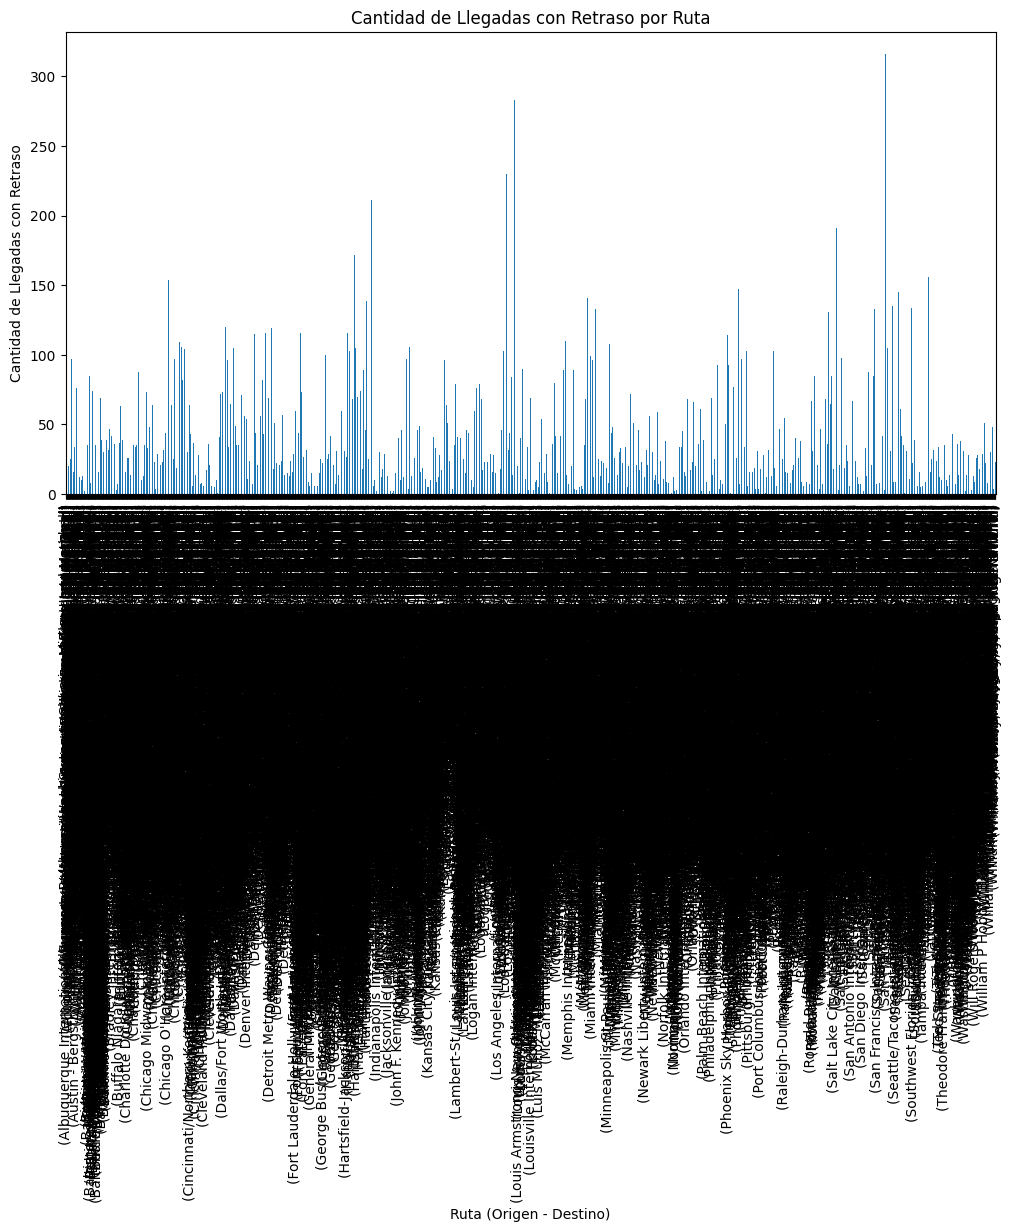

In [ ]:
flights_con_retraso = flights[flights['ArrDelay'] > 0]

# Agrupa por origen y destino y cuenta las llegadas con retraso en cada ruta
conteo_por_ruta = flights_con_retraso.groupby(['OriginAirportName', 'DestAirportName']).size()

# Encuentra la ruta con la máxima cantidad de llegadas con retraso
ruta_con_mas_llegadas_con_retraso = conteo_por_ruta.idxmax()
print('la peor ruta',ruta_con_mas_llegadas_con_retraso)
plt.figure(figsize=(12, 6))
conteo_por_ruta.plot(kind='bar')
plt.xlabel('Ruta (Origen - Destino)')
plt.ylabel('Cantidad de Llegadas con Retraso')
plt.title('Cantidad de Llegadas con Retraso por Ruta')
plt.xticks(rotation=90)


la peor ruta ('Louis Armstrong New Orleans International', 'Ronald Reagan Washington National') con 25.333333333333332


(array([   0,    1,    2, ..., 2476, 2477, 2478]),
 [Text(0, 0, '(Albuquerque International Sunport, Baltimore/Washington International Thurgood Marshall)'),
  Text(1, 0, '(Albuquerque International Sunport, Chicago Midway International)'),
  Text(2, 0, "(Albuquerque International Sunport, Chicago O'Hare International)"),
  Text(3, 0, '(Albuquerque International Sunport, Dallas Love Field)'),
  Text(4, 0, '(Albuquerque International Sunport, Dallas/Fort Worth International)'),
  Text(5, 0, '(Albuquerque International Sunport, Denver International)'),
  Text(6, 0, '(Albuquerque International Sunport, George Bush Intercontinental/Houston)'),
  Text(7, 0, '(Albuquerque International Sunport, Hartsfield-Jackson Atlanta International)'),
  Text(8, 0, '(Albuquerque International Sunport, John F. Kennedy International)'),
  Text(9, 0, '(Albuquerque International Sunport, Kansas City International)'),
  Text(10, 0, '(Albuquerque International Sunport, Los Angeles International)'),
  Text(11, 0

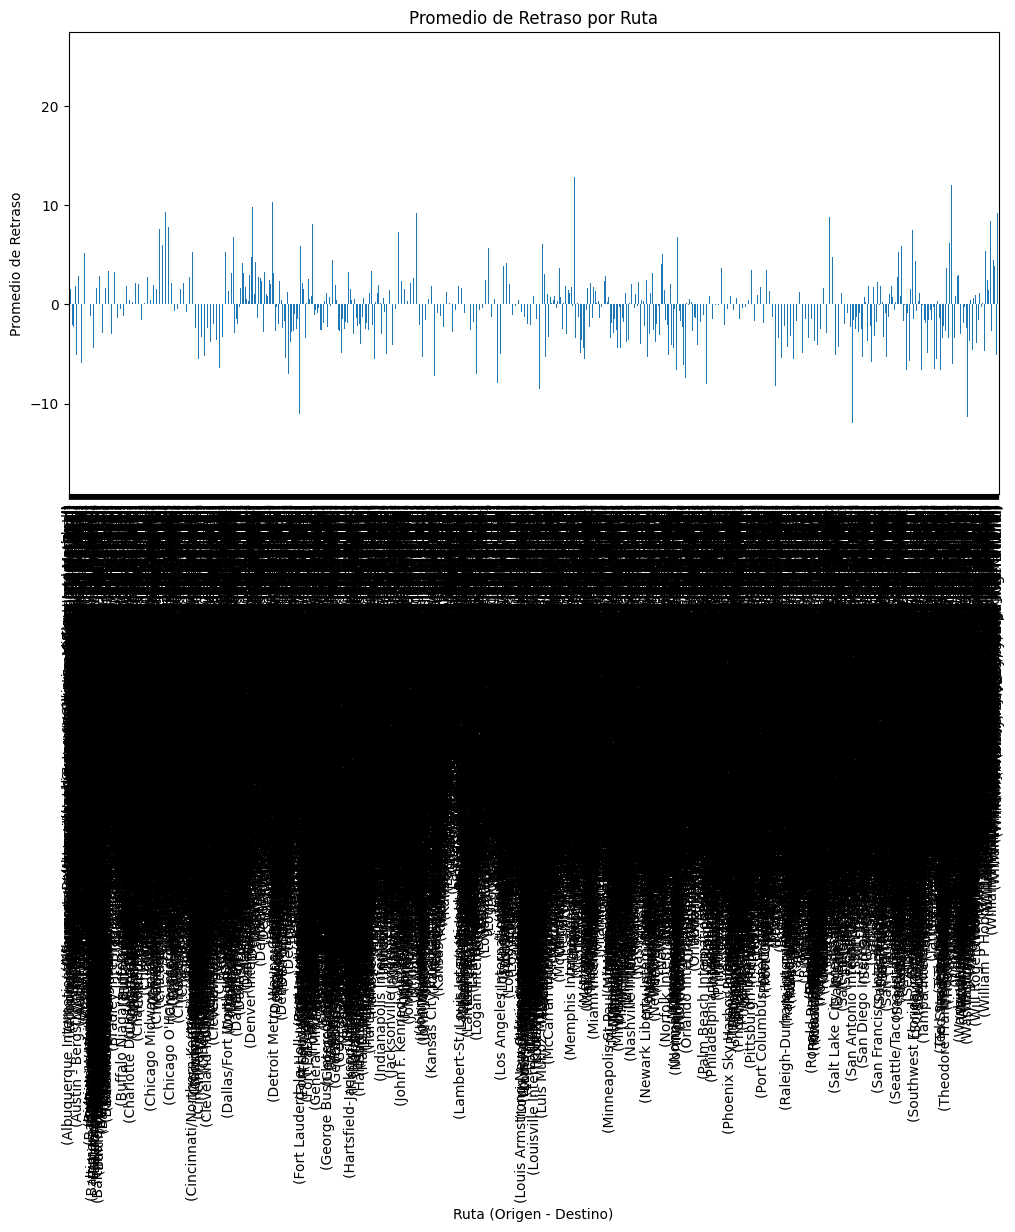

In [ ]:

# Agrupa por origen y destino y cuenta las llegadas con retraso en cada ruta
promedio_por_ruta = flights.groupby(['OriginAirportName', 'DestAirportName'])['ArrDelay'].mean()
# Encuentra la ruta con la máxima cantidad de llegadas con retraso
Ruta_con_mas_retraso = promedio_por_ruta.idxmax()
pr_max=promedio_por_ruta.max()
print('la peor ruta',Ruta_con_mas_retraso,'con',pr_max)
plt.figure(figsize=(12, 6))
promedio_por_ruta.plot(kind='bar')
plt.xlabel('Ruta (Origen - Destino)')
plt.ylabel('Promedio de Retraso')
plt.title('Promedio de Retraso por Ruta')
plt.xticks(rotation=90)